In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
customer_behavior_df=pd.read_csv("/content/drive/MyDrive/DEPI/Machine Learning/Customer_Behavior_Intelligence_System/File 1.csv")

# Explore Data

In [182]:
customer_behavior_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193


In [183]:
customer_behavior_df.tail()

,feature_0,feature_1,feature_2,feature_3,feature_4
495,-1.717106,0.772110,0.117375,-1.134905,-0.795564
496,-0.775524,0.864913,0.670800,-1.384047,-0.524277
497,-1.168657,0.963444,0.422672,-1.461787,-0.579008
498,-0.264773,-1.262000,1.305169,0.567142,1.698487
499,0.270025,-0.606921,-1.927713,0.059962,-0.005164


In [184]:
customer_behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   feature_2  500 non-null    float64
 3   feature_3  500 non-null    float64
 4   feature_4  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [185]:
customer_behavior_df.isnull().sum()

,0
feature_0,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0


In [186]:
customer_behavior_df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-2.344791e-16,-1.314504e-16,5.684342e-16,-1.882938e-16,-2.877698e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.268404e+00,-1.582220e+00,-2.404161e+00,-2.370457e+00,-1.269599e+00
25%,-7.000235e-01,-9.278037e-01,-7.185726e-01,-8.836220e-01,-7.241618e-01
50%,-1.225416e-01,1.318703e-01,2.734487e-01,2.918948e-01,-4.097401e-01
75%,6.630546e-01,9.653978e-01,7.739601e-01,8.173842e-01,6.277492e-01
max,2.161047e+00,1.260191e+00,1.783935e+00,1.947826e+00,2.191764e+00


In [187]:
duplicates=customer_behavior_df.duplicated()
customer_behavior_df[duplicates]

,feature_0,feature_1,feature_2,feature_3,feature_4


In [188]:
customer_behavior_df.shape

(500, 5)

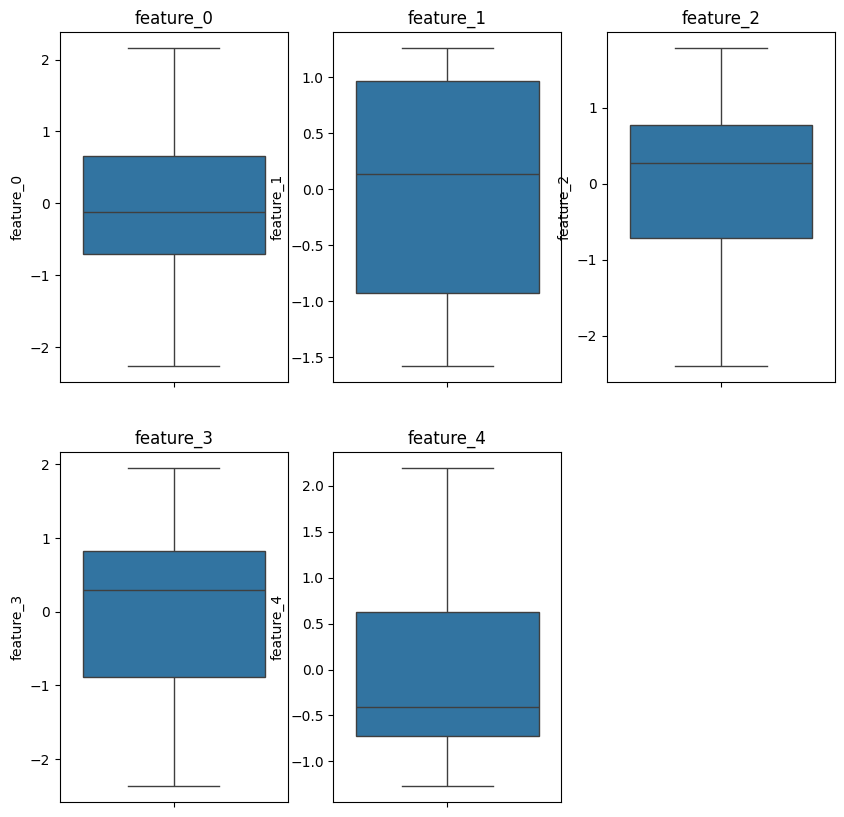

In [189]:
plt.figure(figsize=(10,10))
x=1
for col in customer_behavior_df:
  plt.subplot(2,3,x)
  sns.boxplot(customer_behavior_df[col])
  plt.title(f"{col}")
  x=x+1
plt.show()

array([[<Axes: title={'center': 'feature_0'}>,
        <Axes: title={'center': 'feature_1'}>],
       [<Axes: title={'center': 'feature_2'}>,
        <Axes: title={'center': 'feature_3'}>],
       [<Axes: title={'center': 'feature_4'}>, <Axes: >]], dtype=object)

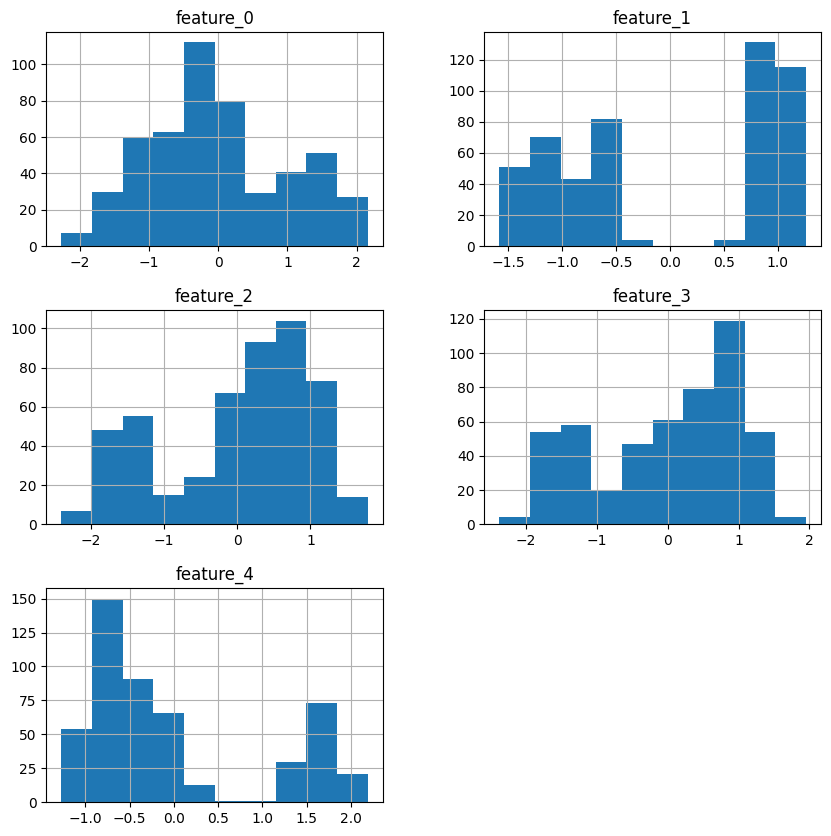

In [190]:
customer_behavior_df.hist(figsize=(10,10))

In [191]:
from scipy.stats import shapiro

stat1, p1 = shapiro(customer_behavior_df['feature_1'])
stat4, p4 = shapiro(customer_behavior_df['feature_4'])
print(stat1)
print(p1)
print('='*10)
print(stat4)
print(p4)
print('='*10)

0.8089810678160348
7.103799227605812e-24
0.8148605355430596
1.5138451766585203e-23


- p less than 0.05

- Feature_1 and Feature_4 distribution I searched a lot for the solution but can not find anything usfel untill yet and the time is run out
- So I will just leave it now , hope I can find solution latter

In [192]:
# #suggested solution to add noise to data but not created any difference
# import numpy as np
# customer_behavior_df_noisy = pd.DataFrame(customer_behavior_df.values + np.random.normal(
#     0, 0.2, customer_behavior_df.shape))

In [193]:
# customer_behavior_df_noisy.hist(figsize=(10,10))

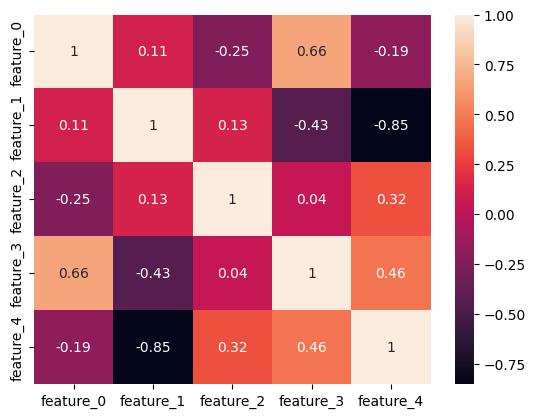

In [194]:
corr=customer_behavior_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

- Need PCA

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()
customer_behavior_df_scaled=scaler.fit_transform(customer_behavior_df)
pca=PCA(n_components=2)
customer_behavior_df_pca=pca.fit_transform(customer_behavior_df_scaled)

In [196]:
customer_behavior_df_scaled

array([[-1.24832456, -1.13717383,  0.27796768,  0.7029521 ,  1.37416635],
       [-1.24100285,  0.72080425,  0.94474905, -1.67214737, -0.69503768],
       [-0.85972776,  0.95529488,  0.74252172, -1.4160555 , -0.82089139],
       ...,
       [-1.16865739,  0.96344409,  0.42267183, -1.46178702, -0.57900792],
       [-0.26477281, -1.26199981,  1.30516874,  0.56714245,  1.69848664],
       [ 0.27002454, -0.60692067, -1.92771285,  0.05996201, -0.00516448]])

# Clustering Data

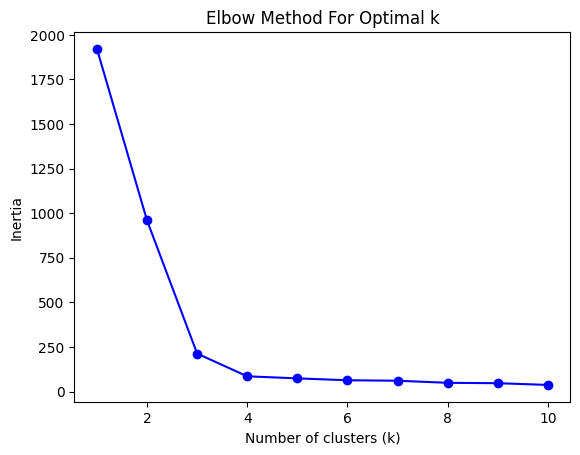

In [197]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_behavior_df_pca)
    inertia.append(kmeans.inertia_)


plt.plot(range(1,11), inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


- Four clusters is good decision

In [198]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit_transform(customer_behavior_df_pca)
kmean_prdict=kmeans.predict(customer_behavior_df_pca)

In [199]:
kmean_prdict

array([1, 2, 2, 2, 0, 2, 3, 1, 2, 3, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 3, 3,
       2, 2, 3, 0, 1, 0, 3, 3, 2, 1, 2, 2, 3, 0, 0, 1, 0, 1, 0, 3, 1, 0,
       0, 1, 3, 0, 3, 1, 1, 1, 3, 0, 2, 0, 0, 1, 2, 3, 0, 2, 3, 1, 1, 0,
       2, 1, 0, 3, 3, 3, 2, 2, 2, 3, 2, 1, 2, 1, 3, 1, 2, 3, 3, 3, 0, 2,
       0, 3, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 3,
       2, 1, 0, 3, 2, 2, 3, 1, 2, 1, 3, 1, 0, 3, 0, 2, 2, 0, 1, 0, 1, 3,
       1, 0, 3, 3, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 3, 3, 3, 3, 3, 1,
       3, 3, 2, 1, 0, 2, 0, 2, 1, 3, 2, 0, 3, 3, 0, 3, 2, 2, 3, 1, 2, 1,
       2, 3, 0, 1, 3, 1, 0, 2, 1, 3, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 3, 2,
       0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 3, 1, 2, 3, 2, 2, 0, 0, 1, 2, 2,
       0, 2, 2, 0, 3, 0, 2, 3, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 3, 2, 2,
       1, 0, 3, 1, 0, 1, 0, 0, 3, 1, 3, 2, 2, 2, 1, 0, 2, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 0, 3, 3, 2, 1, 3, 1, 2, 2, 3, 0, 0, 0, 2, 3, 1, 2, 3,
       0, 2, 1, 2, 2, 0, 3, 2, 2, 0, 1, 1, 3, 3, 1,

# Classification model

In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    customer_behavior_df_pca,kmean_prdict,test_size=0.2,random_state=42)

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]
    }
grid_search_knn=GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    verbose=2
)
grid_search_knn.fit(x_train,y_train)
print(f"Best Param: {grid_search_knn.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END metric=mink

In [202]:
from sklearn.metrics import accuracy_score
y_predict_knn=grid_search_knn.predict(x_test)
accuracy_score(y_test,y_predict_knn)

1.0

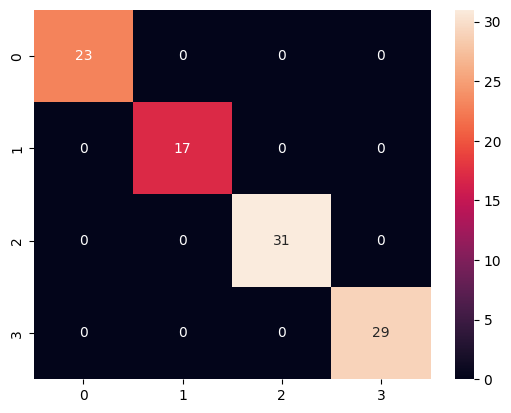

In [203]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict_knn)
sns.heatmap(cm,annot=True)
plt.show()

In [204]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
param_grid={
    'C':[0.1,1,10,100],
    'gamma':[0.01,0.1,1,10]
}
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=2
)
grid_search.fit(x_train,y_train)
print(f"Best Param: {grid_search.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=

In [205]:
best_perdiction_svm=grid_search.predict(x_test)

In [206]:
accuracy_score(y_test,best_perdiction_svm)

1.0

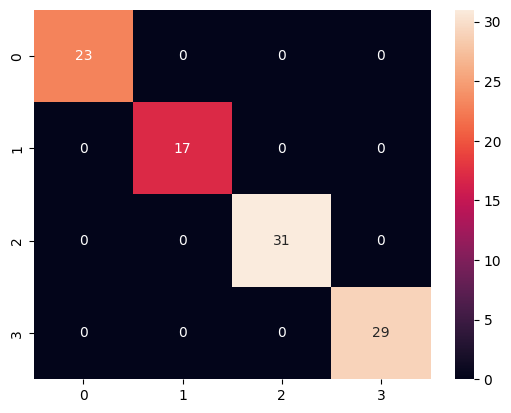

In [207]:
cm=confusion_matrix(y_test,best_perdiction_svm)
sns.heatmap(cm,annot=True)
plt.show()

# Regression model

In [208]:
# random generation to column
import numpy as np
np.random.seed(42)
customer_behavior_df["user_spending"] = (
    50
    + 10 * customer_behavior_df["feature_0"]
    - 5 * customer_behavior_df["feature_1"]
    + 7 * customer_behavior_df["feature_2"]
    + 3 * customer_behavior_df["feature_3"]
    - 8 * customer_behavior_df["feature_4"]
    + np.random.normal(0, 5, customer_behavior_df.shape[0])
)


In [218]:
y=customer_behavior_df["user_spending"]
x=customer_behavior_df.drop(columns=["user_spending"])

In [210]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x=min_max_scaler.fit_transform(x)

In [211]:
x_train_regg,x_test_regg,y_train_regg,y_test_regg=train_test_split(
    x,y,test_size=0.2,random_state=42,shuffle=True)

In [212]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [213]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_predict)

In [214]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
r2

0.12883065373297198

# visualization

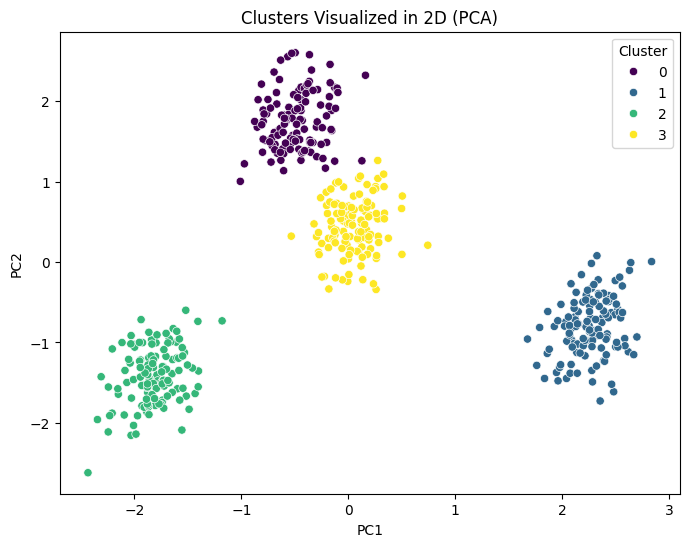

In [215]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=customer_behavior_df_pca[:,0],
                y=customer_behavior_df_pca[:,1], hue=kmean_prdict, palette="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters Visualized in 2D (PCA)")
plt.legend(title="Cluster")
plt.show()